In [2]:
!pip install biopython

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
import pandas as pd

#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

## 1 ##
## Dr. X: this gets sequences 
## Please finish documenting this function with comments, or in notebook markdown text
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.
def get_sequences_from_file(fasta_fn):
   # this function takes in a .fasta file as an argument,
   # which is used as an input and
   # outputs a set containing sequences. 
   # For each data entry in the input file,
   # a sequence is selected based on the species name.
   # return type = set containing keys(species name) and values(sequences)
   
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [2]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
def translate_function(string_nucleotides): 
    # get the data table associated with 'Vertebrate Mitochondrial' from the BioPython library
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    #initialize an empty string to store the translated sequence
    aa_seq_string = '' 
    
    # loop through the inpout string with a step size = 3
    for i in range(1, len(string_nucleotides), 3):
        
      #get a codon of length = 3  
      codon = string_nucleotides[i:i+3]

      # now we check the end of the current codon for a stop
      if codon in ["TAA", "TAG", "AGA", "AGG"]:
        return aa_seq_string
      # now we retrieve the amino acid and add it to sequence string(aa_seq_string)
      aa_seq_string = aa_seq_string+mito_table.forward_table[codon]
    return(aa_seq_string)

In [3]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

def translate_viaLib(string_nucleotides):
  # seq_string is the output sequence
  # we use the translate function from BioPython library
  # table=2 refers to ID=2 in the BioPython library for "Vertebrate Mitochondrial"
  seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
  return seq_string


In [4]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    
    # use ProteinAnalysis and store its output on a temporary variable 'temp_aa'
    temp_aa = ProteinAnalysis(aa_seq)
    
    # calculate molecular weight for temp_aa
    mol_weight = temp_aa.molecular_weight()
    return mol_weight

In [5]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.
def gc_content(dna_string):
    # get the number of times 'C' appears in the input dna string
    c_count = dna_string.count("C")
    
    # get the number of times 'G' appears in the input dna string
    g_count = dna_string.count("G")
    
    # get the length of the input dna string
    string_length = len(dna_string)
    
    # calculate gc content
    gc = (c_count+g_count)/string_length
    return  gc


In [6]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#
import numpy as np

file1 = 'bears_cytb.fasta'
cytb_seqs = get_sequences_from_file(file1) 
print(cytb_seqs)

file2 = 'bears_mass.csv'
bears_df = pd.read_csv(file2) # Includes only data for body mass 
species_list = list(bears_df.species)


{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA'), 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'), 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA'), 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA'), 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'), 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA'), 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA'), 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA'), 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA')}


In [7]:
## 6 ## 
## Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

# add molecular_weight as a column and initialize all its values as NaN
bears_df["molecular_weight"] = np.nan

# add GC_content as a column and initialize all its values as NaN
bears_df["GC_content"] = np.nan

# print dataframe to check
print(bears_df)

                  species     mass  molecular_weight  GC_content
0          Ursus spelaeus  550.800               NaN         NaN
1            Ursus arctos  203.500               NaN         NaN
2        Ursus thibetanus   99.714               NaN         NaN
3        Melursus ursinus  100.030               NaN         NaN
4        Ursus americanus  110.560               NaN         NaN
5     Helarctos malayanus   47.020               NaN         NaN
6  Ailuropoda melanoleuca  118.200               NaN         NaN
7      Tremarctos ornatus  140.700               NaN         NaN
8         Ursus maritimus  425.100               NaN         NaN


In [9]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

# initialize an empty list for molecular weight and GC content
# this allows us to store all values in a single data structure
molecular_wt_list = []
gc_content_list = []

# for loop through the species
# key refers to species
# value refers dna sequence associated
# with each of the species.
for key, value in cytb_seqs.items():
    
    # translate the initial dna sequence
    aa_seq = translate_viaLib(value)
    
    # compute the molecular weight
    mol_wt = compute_molecular_weight(str(aa_seq))
    
    # compute the GC content
    gc_prop = gc_content(value)
    
    # append the computed values of GC_content and
    # molecular_weight to our previously defined lists
    molecular_wt_list.append(mol_wt)
    gc_content_list.append(gc_prop)

# update values from NaN to computed values
# for molecular_weight and GC_content
bears_df["molecular_weight"] = molecular_wt_list
bears_df["GC_content"] = gc_content_list

# print for a check
print(bears_df)
    

                  species     mass  molecular_weight  GC_content
0          Ursus spelaeus  550.800        42458.7992    0.437719
1            Ursus arctos  203.500        42414.7435    0.437719
2        Ursus thibetanus   99.714        42306.6735    0.456140
3        Melursus ursinus  100.030        42551.9900    0.451754
4        Ursus americanus  110.560        42427.7439    0.439474
5     Helarctos malayanus   47.020        42560.8910    0.442982
6  Ailuropoda melanoleuca  118.200        42702.1845    0.407895
7      Tremarctos ornatus  140.700        42384.8266    0.443860
8         Ursus maritimus  425.100        42454.7873    0.442982


<AxesSubplot:title={'center':'Mass by species'}, xlabel='species'>

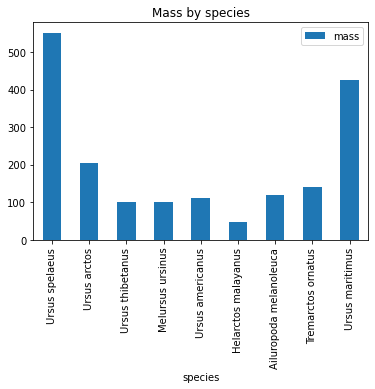

In [8]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
## *Q2* What else is interesting about this species?

# used for plotting in jupyter notebook
%matplotlib inline

# plot mass using the dataframe
bears_df.plot(kind='bar',x='species',y='mass', title='Mass by species')

#####Answers#####
# Q1: Ursus spelaeus is the largest bear species
# Q2: Theie GC content is similar to other species. However, their molecular weight is not the highest.

<AxesSubplot:title={'center':'molecular weight (y-axis) as a function of GC-content (x-axis)'}, xlabel='GC_content', ylabel='molecular_weight'>

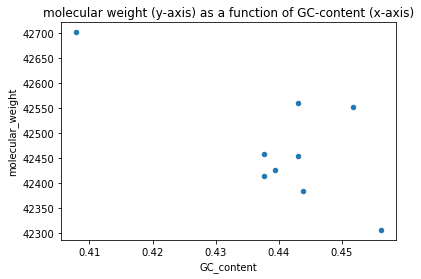

In [10]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

# define data for x-axis and y-axis
x_data = molecular_wt_list
y_data = gc_content_list

# use a scatterplot for a better visualization
bears_df.plot(kind='scatter',x="GC_content",y="molecular_weight", title='molecular weight (y-axis) as a function of GC-content (x-axis)')


In [13]:
## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"
bears_df.to_csv('bears_mass_cytb.csv', index=False)

In [22]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

In [11]:
# read saved csv file again
file3 = 'bears_mass_cytb.csv'
newBears_df = pd.read_csv(file3)
print(newBears_df)

                  species     mass  molecular_weight  GC_content
0          Ursus spelaeus  550.800        42458.7992    0.437719
1            Ursus arctos  203.500        42414.7435    0.437719
2        Ursus thibetanus   99.714        42306.6735    0.456140
3        Melursus ursinus  100.030        42551.9900    0.451754
4        Ursus americanus  110.560        42427.7439    0.439474
5     Helarctos malayanus   47.020        42560.8910    0.442982
6  Ailuropoda melanoleuca  118.200        42702.1845    0.407895
7      Tremarctos ornatus  140.700        42384.8266    0.443860
8         Ursus maritimus  425.100        42454.7873    0.442982


In [12]:
def at_content(dna_string):
    # get the number of times 'A' appears in the input dna string
    a_count = dna_string.count("A")
    
    # get the number of times 'T' appears in the input dna string
    t_count = dna_string.count("T")
    
    # get the length of the input dna string
    string_length = len(dna_string)
    
    # calculate gc content
    at = (a_count+t_count)/string_length
    return  at

In [13]:
newBears_df["AT_content"] = np.nan
print(newBears_df)

                  species     mass  molecular_weight  GC_content  AT_content
0          Ursus spelaeus  550.800        42458.7992    0.437719         NaN
1            Ursus arctos  203.500        42414.7435    0.437719         NaN
2        Ursus thibetanus   99.714        42306.6735    0.456140         NaN
3        Melursus ursinus  100.030        42551.9900    0.451754         NaN
4        Ursus americanus  110.560        42427.7439    0.439474         NaN
5     Helarctos malayanus   47.020        42560.8910    0.442982         NaN
6  Ailuropoda melanoleuca  118.200        42702.1845    0.407895         NaN
7      Tremarctos ornatus  140.700        42384.8266    0.443860         NaN
8         Ursus maritimus  425.100        42454.7873    0.442982         NaN


In [14]:
at_content_list = []
# gc_content_list = []
for key, value in cytb_seqs.items():
    
    # compute the AT content
    at_prop = at_content(value)
    
    # append the computed values of GC_content and
    # molecular_weight to our previously defined lists
    at_content_list.append(at_prop)


In [33]:
newBears_df["AT_content"] = at_content_list
print(newBears_df)

                  species     mass  molecular_weight  GC_content  AT_content
0          Ursus spelaeus  550.800        42458.7992    0.437719    0.562281
1            Ursus arctos  203.500        42414.7435    0.437719    0.562281
2        Ursus thibetanus   99.714        42306.6735    0.456140    0.543860
3        Melursus ursinus  100.030        42551.9900    0.451754    0.548246
4        Ursus americanus  110.560        42427.7439    0.439474    0.560526
5     Helarctos malayanus   47.020        42560.8910    0.442982    0.557018
6  Ailuropoda melanoleuca  118.200        42702.1845    0.407895    0.592105
7      Tremarctos ornatus  140.700        42384.8266    0.443860    0.556140
8         Ursus maritimus  425.100        42454.7873    0.442982    0.557018


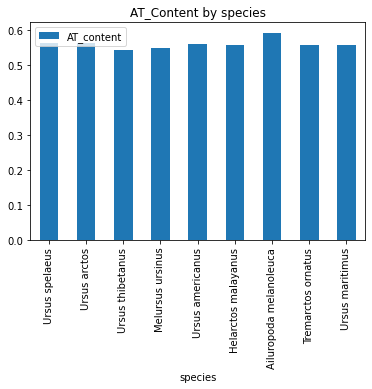

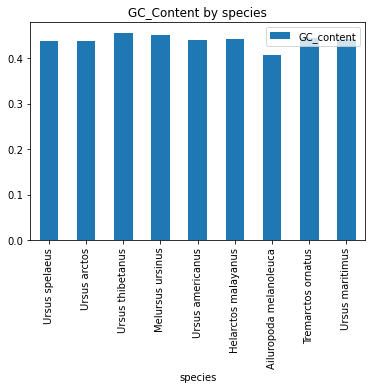

In [34]:
import matplotlib.pyplot as plt

## Plot a visualization of the mass (y-axis) as a function of AT-content (x-axis).

bears_df.plot(kind='bar',x='species',y='AT_content', title='AT_Content by species')
bears_df.plot(kind='bar',x='species',y='GC_content', title='GC_Content by species')
